In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93,219.498876


In [4]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,5.562795,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45,99.641198
1,2014-08-12,5.564520,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45,99.641198
2,2014-08-13,5.564712,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45,99.641198
3,2014-08-14,5.567008,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45,99.641198
4,2014-08-15,5.566052,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93,219.498876
2431,2024-08-06,6.317490,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93,219.498876
2432,2024-08-07,6.320876,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93,219.498876
2433,2024-08-08,6.320948,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93,219.498876


In [5]:
x = []
y = []
for i in range(data.shape[0]-5):
    x.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x = np.array(x)
y = np.array(y)

In [6]:
#x = x.reshape(x.shape[0],x.shape[1],1)

In [7]:
x.shape

(2430, 5, 1)

In [8]:
y.shape

(2430,)

In [9]:
x

array([[[5.56279478],
        [5.56452041],
        [5.56471196],
        [5.56700773],
        [5.5660518 ]],

       [[5.56452041],
        [5.56471196],
        [5.56700773],
        [5.5660518 ],
        [5.55644189]],

       [[5.56471196],
        [5.56700773],
        [5.5660518 ],
        [5.55644189],
        [5.55354081]],

       ...,

       [[6.33908866],
        [6.34721406],
        [6.35269908],
        [6.32782964],
        [6.31748954]],

       [[6.34721406],
        [6.35269908],
        [6.32782964],
        [6.31748954],
        [6.3208762 ]],

       [[6.35269908],
        [6.32782964],
        [6.31748954],
        [6.3208762 ],
        [6.32094813]]])

In [10]:
x_train = x[:1944]
y_train = y[:1944]
x_test  = x[1944:]
y_test  = y[1944:]

In [11]:
x_test.shape

(486, 5, 1)

In [12]:
x_train.shape

(1944, 5, 1)

In [13]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    from tensorflow.keras.layers import BatchNormalization
    model = Sequential()
    model.add(Dense(200, input_shape = (5,1), activation = 'relu'))
    model.add(LSTM(200))
    model.add(Dense(2000,activation='relu'))
    model.add(Dense(200, activation="relu"))
    model.add(Dense(1,activation='linear'))
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='mean_squared_error')
    model.fit(x_train, y_train,
                epochs=300,
                batch_size=256,
                validation_data=(x_test, y_test),
                verbose=1)
    
    pred = model.predict(x_test)
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5, 200)              │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2000)                │         402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         400,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,601 (4.29 MB)

 Trainable params: 1,123,601 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 29.5729 - val_loss: 25.0160
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 19.1203 - val_loss: 12.7568
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.1964 - val_loss: 1.5286
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5698 - val_loss: 1.1372
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.2431 - val_loss: 0.0930
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0909 - val_loss: 0.3574
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2049 - val_loss: 0.1953
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0446 - val_loss: 0.0019
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0347 - val_loss: 0.0021
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0121 - val_loss: 0.0508
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0103 - val_loss: 0.0424
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0054 - va

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031 - val_loss: 0.0184
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030 - val_loss: 0.0182
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031 - val_loss: 0.0182
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0029 - val_loss: 0.0176
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0030 - val_loss: 0.0178
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0030 - val_loss: 0.0174
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029 - val_loss: 0.0175
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0029 - val_loss: 0.0174
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0029 - val_loss: 0.0173
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029 - val_loss: 0.0171
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0028 - val_loss: 0.0172
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0029

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.9812e-04 - val_loss: 0.0036
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.0503e-04 - val_loss: 0.0041
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.7874e-04 - val_loss: 0.0045
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.8344e-04 - val_loss: 0.0041
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.7850e-04 - val_loss: 0.0038
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.7818e-04 - val_loss: 0.0039
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.6063e-04 - val_loss: 0.0038
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.5421e-04 - val_loss: 0.0044
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.5021e-04 - val_loss: 0.0038
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.1816e-04 - val_loss: 0.0034
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.1991e-04 - val_loss: 0.0035
Epoch 216/300
8/8 ━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 5, 200)              │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2000)                │         402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │         400,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,601 (4.29 MB)

 Trainable params: 1,123,601 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 31.0233 - val_loss: 28.8832
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23.0320 - val_loss: 18.9989
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.8002 - val_loss: 6.7891
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3.6292 - val_loss: 0.0035
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5132 - val_loss: 1.0283
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7580 - val_loss: 0.0508
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0865 - val_loss: 0.3967
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1719 - val_loss: 0.0427
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0363 - val_loss: 0.0125
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0051 - val_loss: 0.0537
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - v

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025 - val_loss: 0.0152
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025 - val_loss: 0.0148
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0025 - val_loss: 0.0142
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0152
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0141
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0147
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0137
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024 - val_loss: 0.0142
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023 - val_loss: 0.0144
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023 - val_loss: 0.0132
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0023 - val_loss: 0.0143
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4.3954e-04 - val_loss: 0.0032
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4.2683e-04 - val_loss: 0.0029
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.4179e-04 - val_loss: 0.0029
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4.2870e-04 - val_loss: 0.0031
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.0877e-04 - val_loss: 0.0029
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.0911e-04 - val_loss: 0.0027
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.7782e-04 - val_loss: 0.0026
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.0099e-04 - val_loss: 0.0026
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.8466e-04 - val_loss: 0.0025
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.8146e-04 - val_loss: 0.0025
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3.8611e-04 - val_loss: 0.0027
Epoch 215/300
8/8 ━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 5, 200)              │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2000)                │         402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │         400,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,601 (4.29 MB)

 Trainable params: 1,123,601 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 31.2236 - val_loss: 29.1576
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23.4180 - val_loss: 19.6883
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.5041 - val_loss: 7.9683
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.4981 - val_loss: 0.0982
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3313 - val_loss: 1.1867
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0177 - val_loss: 0.0018
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0434 - val_loss: 0.3991
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1986 - val_loss: 0.1326
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0241 - val_loss: 0.0024
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0343 - val_loss: 0.0035
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - val_loss: 0.0506
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0098 - v

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0032 - val_loss: 0.0190
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0033 - val_loss: 0.0190
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032 - val_loss: 0.0189
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0190
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0187
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0185
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031 - val_loss: 0.0187
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_loss: 0.0182
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_loss: 0.0186
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0186
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_loss: 0.0179
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9130e-04 - val_loss: 0.0046
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.5200e-04 - val_loss: 0.0043
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.7227e-04 - val_loss: 0.0045
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.3026e-04 - val_loss: 0.0049
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.8391e-04 - val_loss: 0.0046
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.0947e-04 - val_loss: 0.0043
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.1007e-04 - val_loss: 0.0041
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.2066e-04 - val_loss: 0.0045
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.9468e-04 - val_loss: 0.0042
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7028e-04 - val_loss: 0.0044
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7488e-04 - val_loss: 0.0039
Epoch 217/

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.6936e-04 - val_loss: 0.0013
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.5965e-04 - val_loss: 0.0012
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5003e-04 - val_loss: 0.0013
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.5143e-04 - val_loss: 0.0012
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.4222e-04 - val_loss: 0.0014
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.4190e-04 - val_loss: 0.0014
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.4296e-04 - val_loss: 0.0012
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.3728e-04 - val_loss: 0.0013
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.4300e-04 - val_loss: 0.0011
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.3461e-04 - val_loss: 0.0010
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.2780e-04 - val_loss: 9.9744e-04
Epoch 283/300
8/8 ━━

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 5, 200)              │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2000)                │         402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 200)                 │         400,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,601 (4.29 MB)

 Trainable params: 1,123,601 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 30.4573 - val_loss: 27.7511
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 21.8736 - val_loss: 16.8324
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.7543 - val_loss: 4.3259
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.9553 - val_loss: 0.5588
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1356 - val_loss: 0.5316
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3396 - val_loss: 0.2368
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1886 - val_loss: 0.3221
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1106 - val_loss: 0.0055
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0230 - val_loss: 0.0062
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0262 - val_loss: 0.0292
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0075 - val_loss: 0.0474
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0070 - v

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0025 - val_loss: 0.0148
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0024 - val_loss: 0.0148
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0144
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0144
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0024 - val_loss: 0.0144
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0144
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0145
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0024 - val_loss: 0.0136
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0149
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023 - val_loss: 0.0132
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0024 - val_loss: 0.0143
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.2158e-04 - val_loss: 0.0042
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.0481e-04 - val_loss: 0.0044
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.9914e-04 - val_loss: 0.0040
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.8566e-04 - val_loss: 0.0038
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.8703e-04 - val_loss: 0.0038
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.7089e-04 - val_loss: 0.0038
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7104e-04 - val_loss: 0.0043
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6139e-04 - val_loss: 0.0039
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.4504e-04 - val_loss: 0.0041
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.4793e-04 - val_loss: 0.0032
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.7055e-04 - val_loss: 0.0031
Epoch 216/300
8/8 ━━━━━━

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 5, 200)              │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2000)                │         402,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 200)                 │         400,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,123,601 (4.29 MB)

 Trainable params: 1,123,601 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 29.4382 - val_loss: 26.2282
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.5062 - val_loss: 15.3818
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.5006 - val_loss: 3.5086
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.4973 - val_loss: 0.5423
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0440 - val_loss: 0.4040
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2894 - val_loss: 0.2404
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1714 - val_loss: 0.3052
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0969 - val_loss: 0.0070
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0238 - val_loss: 0.0030
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0212 - val_loss: 0.0374
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0084 - val_loss: 0.0535
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0073 - v

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0032 - val_loss: 0.0184
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031 - val_loss: 0.0191
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0189
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0031 - val_loss: 0.0184
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0031 - val_loss: 0.0183
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030 - val_loss: 0.0182
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_loss: 0.0177
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030 - val_loss: 0.0181
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0029 - val_loss: 0.0175
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0030 - val_loss: 0.0177
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0029 - val_loss: 0.0177
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0030

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.4440e-04 - val_loss: 0.0051
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.1721e-04 - val_loss: 0.0048
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.9033e-04 - val_loss: 0.0045
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.8373e-04 - val_loss: 0.0039
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.8190e-04 - val_loss: 0.0042
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.5678e-04 - val_loss: 0.0035
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.4284e-04 - val_loss: 0.0040
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 6.4665e-04 - val_loss: 0.0037
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.2356e-04 - val_loss: 0.0041
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.5896e-04 - val_loss: 0.0041
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.1401e-04 - val_loss: 0.0041
Epoch 216/300
8/8 ━━━━━━

,truth,pred,pred,pred,pred,pred
0,5.969168,5.951310,5.960330,5.956617,5.949403,5.960240
1,5.965018,5.953097,5.962174,5.958436,5.951181,5.962055
2,5.969270,5.953078,5.962178,5.958547,5.951192,5.962086
3,5.971262,5.953745,5.962859,5.959132,5.951834,5.962725
4,5.970037,5.955305,5.964460,5.960705,5.953382,5.964302
...,...,...,...,...,...,...
481,6.327830,6.299319,6.295362,6.301485,6.296156,6.313162
482,6.317490,6.295620,6.292262,6.298446,6.292596,6.309658
483,6.320876,6.290555,6.287846,6.293987,6.287619,6.304643
484,6.320948,6.287128,6.284655,6.290663,6.284174,6.301118


In [14]:
df.to_csv('./data/LSTM-无外生变量预测值.csv',header=True,index=False)

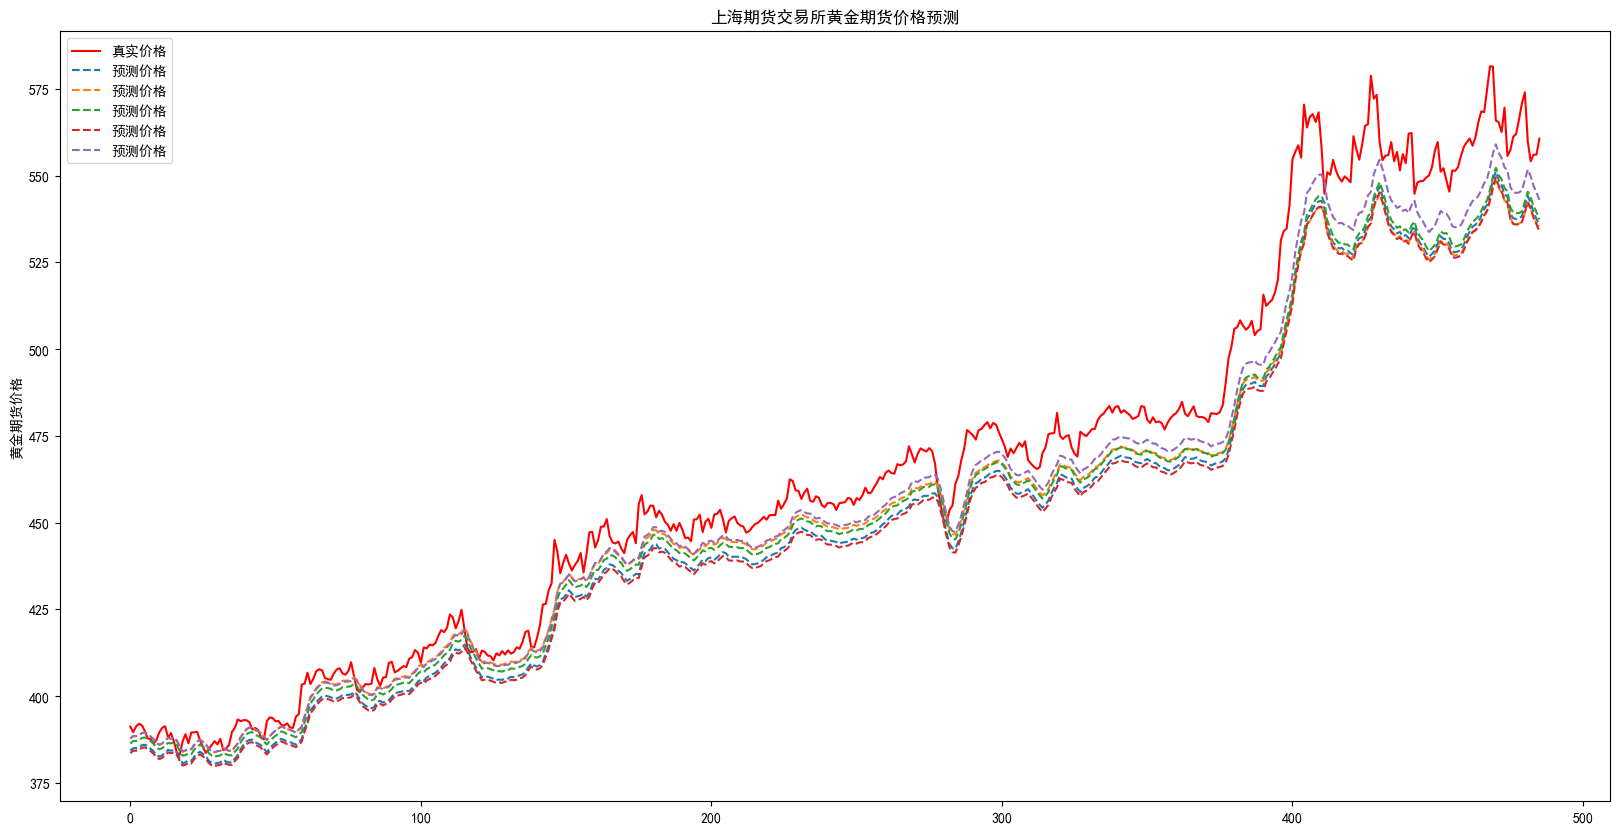

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()